## problem 2  
# part I

# a) 

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def rect_window(xq , x0 , h):
    if abs((xq - x0)/h) < 1/2 : return 1/h
    return 0

In [184]:
def parzen_estimate(data , window , h , ecc = 1):
    low = min(data) - max(data)
    up = max(data) + max(data)
    x = np.linspace(low , up , ecc*len(data))
    p = np.zeros(x.shape)
    for i , x0 in enumerate(x):
        for xq in data :
            p[i] += window(xq , x0 , h)
        p[i] /= len(data)
    return x , p

In [99]:
def plot_parzen(data , j , window, h = 1) :
    x , p = parzen_estimate(data ,window , h/(np.power(j , 0.5)))
    plt.plot(list(x) , list(p))
    plt.title(f'parzen estimation rectangular window , j = {j} , h={h}')
    plt.xlabel('x')
    plt.ylabel('probability')

In [100]:
data = np.array([-7 , -5 , -4 , -3 , -2 , 0 , 3 , 4 , 5, 7])

#  j = 1 

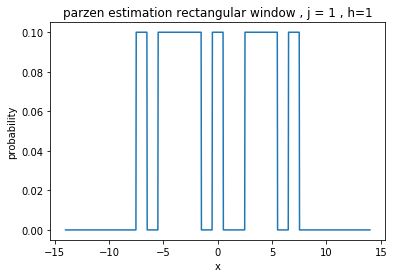

In [101]:
j = 1
plot_parzen(data , j , rect_window)

# j = 4 

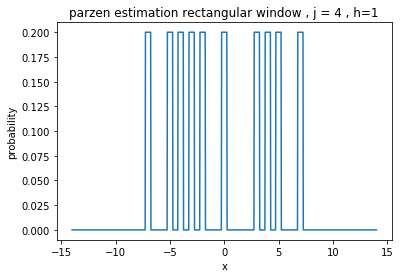

In [102]:
j = 4
plot_parzen(data , j , rect_window)

# j = 11 

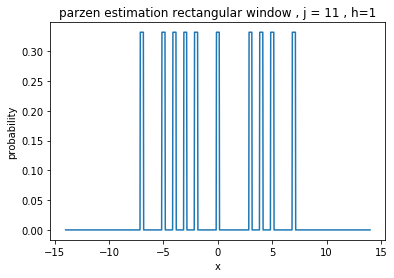

In [103]:
j = 11
plot_parzen(data , j , rect_window)

# b) 

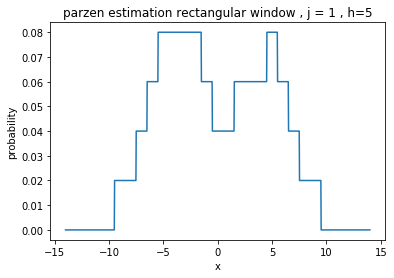

In [104]:
j = 1
plot_parzen(data , j , rect_window , h = 5)

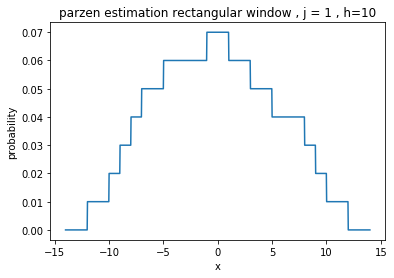

In [105]:
j = 1
plot_parzen(data , j ,rect_window, h = 10)

# part II

In [106]:
def knn_estimate(data , k , x0) :
    dist = np.abs(data - x0)
    dist.sort()
    return k/dist[k-1]/len(data)
    

In [107]:
data = np.array([0 , 1, 3 , 4.5 , 5.5 , 6 , 6.5 , 7 , 7.2 , 7.5 , 8 , 8.8 , 9.2 , 9.3 , 11 , 13])

Text(0, 0.5, 'probability')

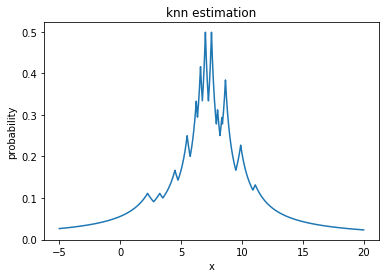

In [108]:
x = np.linspace(-5 , 20 , 10000)
p = np.zeros(x.shape)
for i , x0 in enumerate(x):
    p[i] = knn_estimate(data , 4 , x0)
plt.plot(x , p)
plt.title('knn estimation')
plt.xlabel('x')
plt.ylabel('probability')

In [109]:
knn_estimate(data , 4 , 2)

0.1

In [110]:
knn_estimate(data , 4 , 4)

0.125

In [111]:
knn_estimate(data , 4 , 6)

0.25

In [112]:
knn_estimate(data , 4 , 8)

0.3124999999999997

In [113]:
knn_estimate(data , 4 , 10)

0.20833333333333345

# part 2 

# a) 

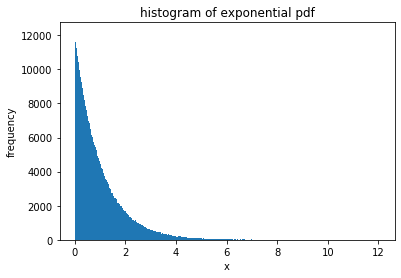

In [114]:
n = 1000000
samples = np.random.exponential(size = (n , 1));
plt.hist(samples , bins= 1000);
plt.title('histogram of exponential pdf');
plt.xlabel('x');
plt.ylabel('frequency');

# b) 

In [138]:
n = 10
samples_10 = np.random.exponential(size = (n , 1));
std_10 = np.std(samples_10)
std_10

1.7039651131078581

In [139]:
n = 100
samples_100 = np.random.exponential(size = (n , 1));
std_100 = np.std(samples_100)
std_100

0.9602753448103519

In [140]:
n = 1000
samples_1000 = np.random.exponential(size = (n , 1));
std_1000 = np.std(samples_1000)
std_1000

0.9665063357733261

In [141]:
def h_star(n , std):
    return 1.06*std*np.power(n , -0.5)

In [147]:
h_s_10 = h_star(10 , std_10)
h_s_10

0.5711715459540502

In [148]:
h_s_100 = h_star(100 , std_100)
h_s_100

0.10178918654989731

In [149]:
h_s_1000 = h_star(1000 , std_1000)
h_s_1000

0.03239743077668819

In [159]:
def guassian_window(xq , x0 , h):
    return 1/(np.power(2*np.pi , 0.5)*h) * np.exp(-np.power((xq-x0),2)/(2*np.power(h,2)))

In [175]:
def exponential(x):
    if x < 0 : return 0
    return np.exp(-x)

In [185]:
def plot_parzen(data , window, h = 1 , ecc = 1) :
    x , p = parzen_estimate(data ,window , h , ecc)
    plt.plot(list(x) , list(p) , 'r' , label = 'estimate')
    
    r = np.zeros(x.shape)
    for i , p in enumerate(x):
        r[i] = exponential(p)
        
    plt.plot(list(x) , list(r) , '--' ,  color = 'black',  label = 'real')
        
    plt.title(f'parzen estimation guassian window , h={h}')
    plt.xlabel('x')
    plt.ylabel('probability')
    plt.legend()

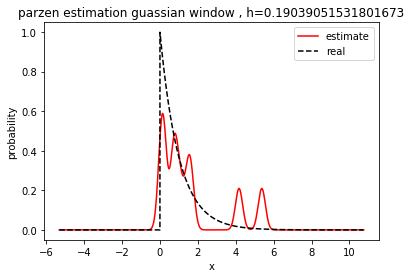

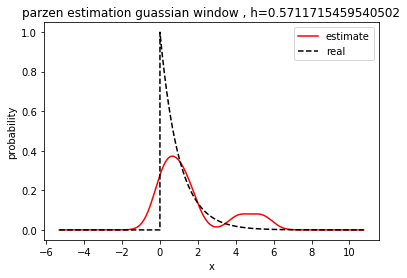

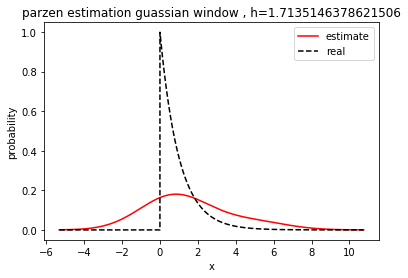

In [186]:
plot_parzen(samples_10 , guassian_window , h_s_10/3 , 1000)
plt.show()
plot_parzen(samples_10 , guassian_window , h_s_10 , 1000)
plt.show()
plot_parzen(samples_10 , guassian_window , h_s_10*3 , 1000)
plt.show()

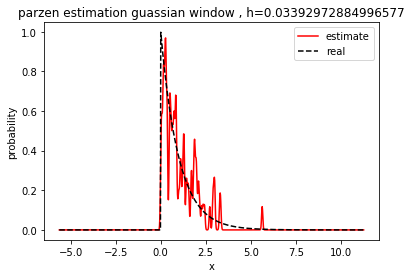

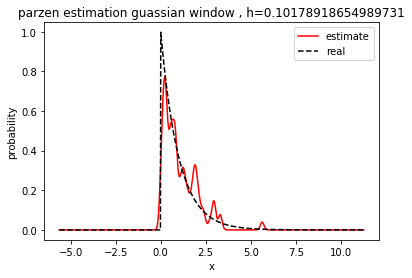

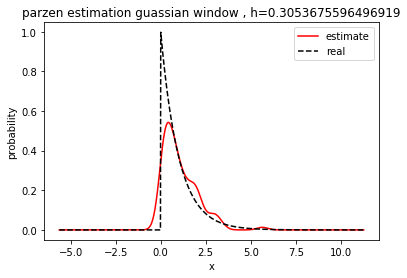

In [188]:
plot_parzen(samples_100 , guassian_window , h_s_100/3 , 10)
plt.show()
plot_parzen(samples_100 , guassian_window , h_s_100 , 10)
plt.show()
plot_parzen(samples_100 , guassian_window , h_s_100*3 , 10)
plt.show()

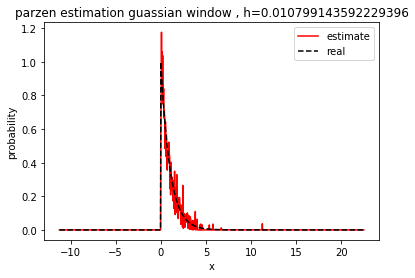

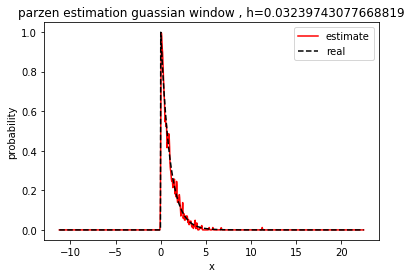

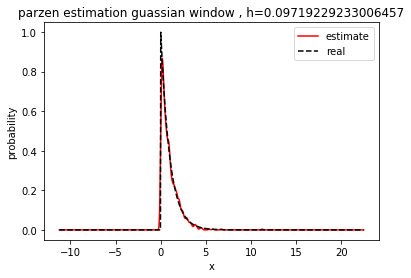

In [189]:
plot_parzen(samples_1000 , guassian_window , h_s_1000/3)
plt.show()
plot_parzen(samples_1000 , guassian_window , h_s_1000)
plt.show()
plot_parzen(samples_1000 , guassian_window , h_s_1000*3)
plt.show()